<h1>              Sentiment Analysis of News Headlines for Stock Price Movement Prediction <h2>

<div style="text-align:center"><h2>STA141B Final Project<h2>
    
<div style="text-align:center"><h4>Group 16 Cindy Li, Wenzhuo Wu, Bo Zhang <h4>

## Abstract

This project is mainly focusing on studying the influence of news headlines on the stock price movements. It started with web-scrapping stock price data from Yahoo Finance and stock news headlines from Financial Visualization for the companeis of interest. Data preprocessings and cleanings were performed on the stock price data, while text preprocessing and sentiment analysis were conducted for the news healines data. Afterwards, the sentiment value was generated by using TextBlob and NLTK-Valder Lexicon tools. Classification models, such as logistic regression, SVM (Support-vector Machine), and random forest were trained and tuned on the data for predicting stock movements. Lastly, model accuracies were compared from different models using the test data. 

## Introduction

The stock market is one of the most important economic participants. Stock market prediction has been an active area of research for a long time. There are many different ways to interpret the different stock market movements. Sentiments derived by users from news headlines have a tremendous effect on the buying and selling patterns of the traders as they easily get influenced by what they read. In this project, analytical tools in Python such as TextBlob and NLTK-Valder Lexicon were used to analyze the sentiment of economic news headlines and examine their effects on stock market changes. This analysis would be especially useful for buyers who are interested in short-term investment based on the financial news and listed companies which need a general idea of the daily market volatility.

This project has three main parts. The influence of the news headlines on 'TSLA', 'AAPL', 'FB', 'GOOG', 'AMZN' stock price movement were evaluated in the first part. Wordcloud was used to show prominence of words in the headlines that appear more frequently for different movement of stock. Then sentiment analysis were performed to quantify the influence of news on the stock. Lastly, stock price changes were predicted by using logistic regression, SVM (Support-vector Machine) and random forest. 

## Problem Statement

The objective of this project is to 

(1) Classify the prominence of words in the news headlines for increased and decreased value stock;

(2) Evaluate the sentiments value of news headlines related to the stocks of interest;

(3) Predict stock price movements based on the sentiments scores. 

## Part I: Web-scrapping and Natural Language Processing

Stock market investment/trading can be difficult and demanding, but it can also be beneficial if accurately forecasted. Stock values can be influenced by many technical indicators and sources of information. But it is challenging to forecast the movement of stock due to the large amount of available data. However, the prediction accuracy is improved as the technology advances in the in the processing of vast amounts of temporal data. Sentiments derived by users from news headlines have a tremendous effect on the buying and selling patterns of the traders as they easily get influenced by what they read. In this part, we scrapped the headline from https://finviz.com/ and stock value from yfinance module in python. The words  in the headlines for stock with increased value and reduced value were clasified repectively. Then word clouds was used to show frequency of words for the two categories. 

### Methodology



News headlines were retrieved from Financial Visualization. The headlines were the main object of study, which will be compiled and used for sentiment analysis. It will have four columns, which include ‘Company’，‘date’, ‘time’ and ‘news headline’.
 

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from yahoo_fin import options

In [ ]:
# import stock names
website_url = 'https://finviz.com/quote.ashx?t='
company_tikcers = ['TSLA', 'AAPL', 'FB', 'GOOG', 'AMZN']

In [ ]:
# generate function to locate headline using beautifulsoup
news_tables = {}

for ticker in company_tikcers:
  url = website_url + ticker
  req = Request(url=url, headers={'user-agent': 'my-scrape'})
  response = urlopen(req)
  html = BeautifulSoup(response, 'html')
  news_data = html.find(id='news-table')
  news_tables[ticker] = news_data

In [ ]:
# get the company, date, time and news headline information
parsed_data = []

for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0][0:7]
    else:
      date = datetime.datetime.strptime(date_data[0], '%b-%d-%y').strftime('%Y/%m/%d')
      time = date_data[1][0:7]

    parsed_data.append([ticker, date, time, title])

In [ ]:
# convert parsed_data into dataframe
dataset_1 = pd.DataFrame(parsed_data, columns=["Company", "Date", "Time", "News Headline"])
dataset_1.to_csv('CompanyNewsHeadlines_WithoutSentiment.csv', index=False)
dataset_1

Company        Date     Time  \
0      TSLA  2022/03/03  06:22PM   
1      TSLA  2022/03/03  06:14PM   
2      TSLA  2022/03/03  05:58PM   
3      TSLA  2022/03/03  04:16PM   
4      TSLA  2022/03/03  04:00PM   
..      ...         ...      ...   
495    AMZN  2022/03/01  08:20AM   
496    AMZN  2022/03/01  08:07AM   
497    AMZN  2022/03/01  07:38AM   
498    AMZN  2022/03/01  07:00AM   
499    AMZN  2022/03/01  07:00AM   

                                         News Headline  
0    Panasonic planning massive battery plant in U....  
1    Teslas Elon Musk Invites UAW to Hold Vote in C...  
2    UPDATE 1-Panasonic planning massive battery pl...  
3    US STOCKS-Wall Street ends lower as war in Ukr...  
4    US STOCKS-Wall Street ends lower as war in Ukr...  
..                                                 ...  
495           How to Be Opportunistic in a Down Market  
496  Teladoc Health (TDOC), Amazon Tie Up to Advanc...  
497     Better Amazon Disruptor: Etsy vs. DigitalOcean  
498  The Ambition Penalty: How Women Are Penalized ...  
499  Tech Sell-Off: 3 Beaten-Down Growth Stocks to ...  

[500 rows x 4 columns]

The stock price information can be obtained from Yahoo Finance from 2022-02-21 to 2022-03-04, which includes 29 rows and 7 columns: ‘date’, ‘open’, ‘high’, ‘low’, ‘close’, ‘adjclose’, and ‘volume’. After comparing the open and close value, “0” was assigned to the stock which has a decreased value and “1” was assigned to the stock which has an increased value. These binary data was combined with the data from ‘finviz.com’ to analyze headline effect.

In [ ]:
import yfinance as yf

In [ ]:
# generate a function to get the stock value
def stock(company_list):
    df = pd.DataFrame()
    for i in company_list:
        stock = yf.Ticker(i)
        hist = stock.history(start="2022-02-24", end="2022-03-04")
        hist.insert(0, "Company", [i]*6, True)
        df = df.append(hist)
        dataset_2=df.iloc[:,0:-2]
    return dataset_2.reset_index()

In [ ]:
dataset_2 = stock(company_tikcers)

In [ ]:
# Generate trend column
# '0' means the stock is decreasing or unchanged (open value <= close value)
# '1' means the stock is increasing (open value > close value)

for i in range(len(dataset_2)):
    if dataset_2.iloc[i,2] > dataset_2.iloc[i,5]:
        dataset_2.loc[i,'Trend'] = '0'
    else:
        dataset_2.loc[i,'Trend'] = '1'

Then merge two datasets together to perform sentiment analysis.

In [ ]:
# Before merge the datasat, we have to make sure the Date type and format in both dataset are the same
# format the type of date column in dataset_2
date_sr = pd.to_datetime(pd.Series(dataset_2["Date"]))
change_format = date_sr.dt.strftime('%Y-%m-%d')
dataset_2['Date']= change_format

In [ ]:
# format the type of date column in dataset_1
date_sr = pd.to_datetime(pd.Series(dataset_1["Date"]))
change_format = date_sr.dt.strftime('%Y-%m-%d')
dataset_1['Date']= change_format #change the format to be the same as the date in dataset_2

In [ ]:
# Merge two dataset
result = pd.merge(dataset_1, dataset_2,how = "left", on=["Date","Company"])
result.to_csv('mergeddata.csv', index=False)
result = pd.read_csv("mergeddata.csv")
result

Company        Date     Time  \
0      TSLA  2022-03-03  06:22PM   
1      TSLA  2022-03-03  06:14PM   
2      TSLA  2022-03-03  05:58PM   
3      TSLA  2022-03-03  04:16PM   
4      TSLA  2022-03-03  04:00PM   
..      ...         ...      ...   
495    AMZN  2022-03-01  08:20AM   
496    AMZN  2022-03-01  08:07AM   
497    AMZN  2022-03-01  07:38AM   
498    AMZN  2022-03-01  07:00AM   
499    AMZN  2022-03-01  07:00AM   

                                         News Headline         Open  \
0    Panasonic planning massive battery plant in U....   878.770020   
1    Teslas Elon Musk Invites UAW to Hold Vote in C...   878.770020   
2    UPDATE 1-Panasonic planning massive battery pl...   878.770020   
3    US STOCKS-Wall Street ends lower as war in Ukr...   878.770020   
4    US STOCKS-Wall Street ends lower as war in Ukr...   878.770020   
..                                                 ...          ...   
495           How to Be Opportunistic in a Down Market  3054.649902   
496  Teladoc Health (TDOC), Amazon Tie Up to Advanc...  3054.649902   
497     Better Amazon Disruptor: Etsy vs. DigitalOcean  3054.649902   
498  The Ambition Penalty: How Women Are Penalized ...  3054.649902   
499  Tech Sell-Off: 3 Beaten-Down Growth Stocks to ...  3054.649902   

            High          Low        Close      Volume  Trend  
0     886.439026   832.600098   839.289978  20340508.0    0.0  
1     886.439026   832.600098   839.289978  20340508.0    0.0  
2     886.439026   832.600098   839.289978  20340508.0    0.0  
3     886.439026   832.600098   839.289978  20340508.0    0.0  
4     886.439026   832.600098   839.289978  20340508.0    0.0  
..           ...          ...          ...         ...    ...  
495  3081.979980  2999.540039  3022.840088   2243700.0    0.0  
496  3081.979980  2999.540039  3022.840088   2243700.0    0.0  
497  3081.979980  2999.540039  3022.840088   2243700.0    0.0  
498  3081.979980  2999.540039  3022.840088   2243700.0    0.0  
499  3081.979980  2999.540039  3022.840088   2243700.0    0.0  

[500 rows x 10 columns]

Word Cloud was performed for stock with increased value and decreased value respectively.

In [ ]:
# Before generate wordcloud, stopword should be defined
# STOPWORDS
from wordcloud import WordCloud, STOPWORDS
import random
stopwords = STOPWORDS
more_stopwords = set(['TSLA', 'AAPL', 'FB', 'GOOG', 'AMZN','Tesla', 'Amazon', 'Facebook', 'Apple','Meta', 'Google', 'Stock', 'Stocks']) 
stopwords = set(stopwords).union(more_stopwords)

In [ ]:
# select the headlines with increasing trend
increase = result.loc[result["Trend"] == '1', "News Headline"]

In [ ]:
# Change the headlines into string
i = increase.to_string()

In [ ]:
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        max_words=5000, stopwords=stopwords, width=800, height=400).generate(i)
# saving the image
word_cloud1.to_file('increase.png')

### Result

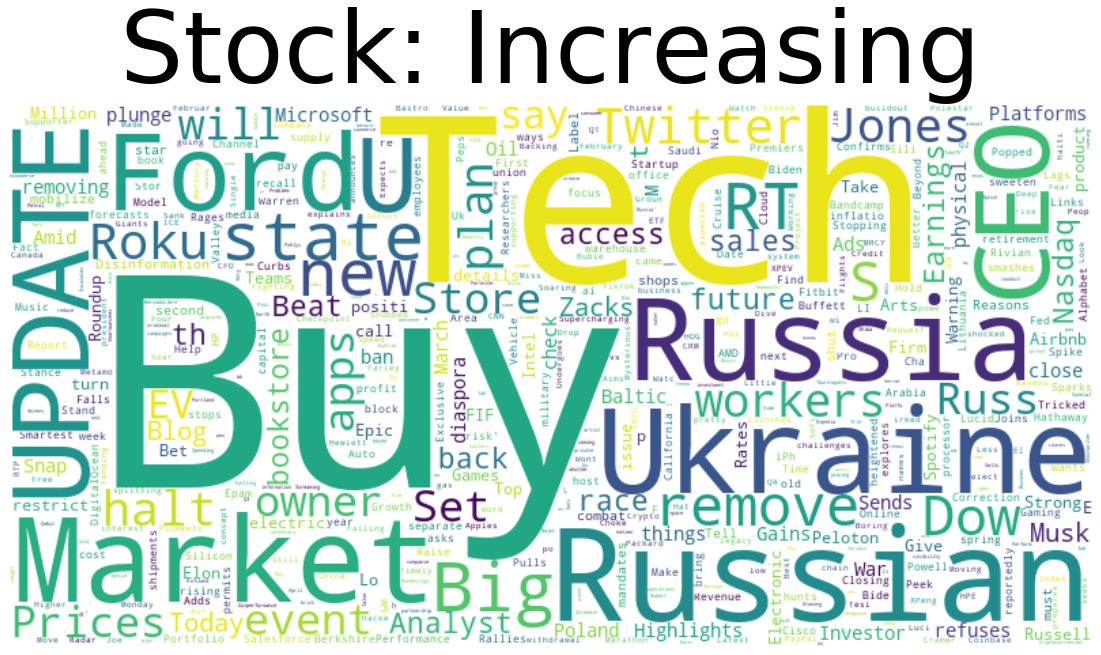

In [ ]:
# Display the generated image:
# the matplotlib way:
# Display the generated Word Cloud
plt.figure(figsize=(20,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.title("Stock: Increasing", size = 100)
plt.axis("off")
plt.show()


<h4>Figure 1. Word cloud of news headlines for stock with increased value <h4>

In [ ]:
# select the headlines with decreasing trend
decrease = result.loc[result["Trend"] == '0', "News Headline"]
# Change the headlines into string
d = decrease.to_string()

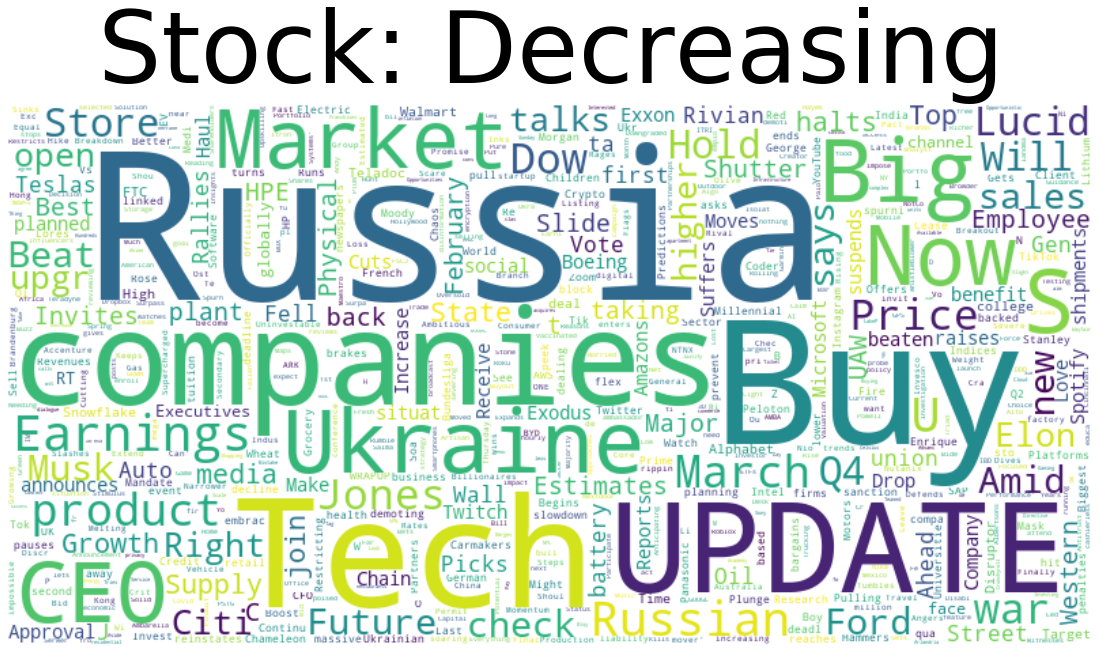

In [ ]:
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        max_words=5000, stopwords=stopwords, width=800, height=400).generate(d)
# saving the image
word_cloud2.to_file('decrease.png')
# Display the generated image:
# the matplotlib way:
# Display the generated Word Cloud
plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title("Stock: Decreasing", size = 100)
plt.axis("off")
plt.show()

<h4>Figure 2. Word cloud of news headlines for stock with decreased value <h4>

### Discussion 


After remove the news headlines in the weekend because the stock value is not available during that time, there are 258 headlines for stock with decreased value and 223 headlines for stock with increased value. The frequency and importance of words in two different categories was showed in figure one and figure two. For stocks with increased value, it is likely to have “Buy”, “Tech”, “Market”, “Russian” and “Update” in the news headline from 2022-02-24 to 2022-03-04, which indicates those words may have positive influence on stock market. However, “Buy”, “Tech”, Market” and “Update” are also most frequent words in the news headlines for decreased value stock. Therefore, those words are both common in decreased value and increased value of stock in the given period due to the current events. 

But their frequency has some differences. For example, although “Buy” is a common word in the headline for increased and decreased value stock, it more likely to appear in the headline with increased stock value. “Russia” is the most frequent word in the headline for decreased value stock. Those words which are common in the headline in a given time period should be considered as relatively neutral words, which is consistent with our understanding that news headline is neutral without bias and personal opinion. But their frequency may shed insight on the inclination. 

## Part II: Sentiment analysis

Sentiment analysis is a type of natural language processing that tries to forecast opinion, feeling, or point of view. The availability of a large amount of sentiment corpus, as well as the enormous potential of sentiment analysis applications, has increased interest in sentiment analysis. Events that happened in the world were reported in news articles. Also it shares expert opinions. Many factors can affect market sentiment. Headline can be regarded as a brief summary of an article which is in a single sentence. In this part, we examined two different approaches, namely TextBlob and NLTK-Valder Lexicon in predicting the sentiment of a news headline. This part two techniques (TextBlob and NLTK-Valder Lexicon tools) in predicting the sentiment of the readers toward news headlines from Financial Visualization were evaluated.----prediction---

### Methodology

***NLTK-Sentiment-Analysis***

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wenzhuowu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#import data
result = pd.read_csv("mergeddata.csv")

In [4]:
#build sentiment analyzer
sia=SentimentIntensityAnalyzer()

#get sentiment compounds
result['NLTK_Compound'] = result['News Headline'].apply(lambda headline: sia.polarity_scores(headline)['compound'])

In [5]:
#define funtion to categorize sentiment compounds
def sentiment_declareation(sentiment_value):
  if -0.2 < sentiment_value <= 0.2:
      return 'neu'
  elif 0.2 < sentiment_value <= 1.0:
      return 'pos'
  elif -1.0 <= sentiment_value <= -0.2:
      return 'neg'

#apply the function to data
result['NLTK_Sentiment'] = result['NLTK_Compound'].apply(lambda value: sentiment_declareation(value))

In [6]:
#store the results to data frame
#change to datetime format
result['Date'] = pd.to_datetime(result.Date).dt.date
result.head()

Company        Date     Time  \
0    TSLA  2022-03-03  06:22PM   
1    TSLA  2022-03-03  06:14PM   
2    TSLA  2022-03-03  05:58PM   
3    TSLA  2022-03-03  04:16PM   
4    TSLA  2022-03-03  04:00PM   

                                       News Headline       Open        High  \
0  Panasonic planning massive battery plant in U....  878.77002  886.439026   
1  Teslas Elon Musk Invites UAW to Hold Vote in C...  878.77002  886.439026   
2  UPDATE 1-Panasonic planning massive battery pl...  878.77002  886.439026   
3  US STOCKS-Wall Street ends lower as war in Ukr...  878.77002  886.439026   
4  US STOCKS-Wall Street ends lower as war in Ukr...  878.77002  886.439026   

          Low       Close      Volume  Trend  NLTK_Compound NLTK_Sentiment  
0  832.600098  839.289978  20340508.0    0.0         0.0000            neu  
1  832.600098  839.289978  20340508.0    0.0         0.0000            neu  
2  832.600098  839.289978  20340508.0    0.0         0.0000            neu  
3  832.600098  839.289978  20340508.0    0.0        -0.8176            neg  
4  832.600098  839.289978  20340508.0    0.0        -0.8176            neg

***TextBlob-Sentiment-Analysis***

In [7]:
from textblob import TextBlob

In [8]:
#apply textblob function to news headlines to get compounds
def textblob_analysis(news_headline):
  analysis = TextBlob(news_headline)
  return analysis.sentiment.polarity

result['TextBlob_Compound'] = result['News Headline'].apply(lambda headline: textblob_analysis(headline))

In [9]:
#classify the sentiment compounds into neu, pos, or neg
def sentiment_declareation(sentiment_value):
  if -0.2 < sentiment_value <= 0.2:
      return 'neu'
  elif 0.2 < sentiment_value <= 1.0:
      return 'pos'
  elif -1.0 <= sentiment_value <= -0.2:
      return 'neg'
    
result['TextBlob_Sentiment'] = result['TextBlob_Compound'].apply(lambda value: sentiment_declareation(value))

In [10]:
#store the results to data frame
#change to datetime format
result['Date'] = pd.to_datetime(result.Date).dt.date
result.head()

Company        Date     Time  \
0    TSLA  2022-03-03  06:22PM   
1    TSLA  2022-03-03  06:14PM   
2    TSLA  2022-03-03  05:58PM   
3    TSLA  2022-03-03  04:16PM   
4    TSLA  2022-03-03  04:00PM   

                                       News Headline       Open        High  \
0  Panasonic planning massive battery plant in U....  878.77002  886.439026   
1  Teslas Elon Musk Invites UAW to Hold Vote in C...  878.77002  886.439026   
2  UPDATE 1-Panasonic planning massive battery pl...  878.77002  886.439026   
3  US STOCKS-Wall Street ends lower as war in Ukr...  878.77002  886.439026   
4  US STOCKS-Wall Street ends lower as war in Ukr...  878.77002  886.439026   

          Low       Close      Volume  Trend  NLTK_Compound NLTK_Sentiment  \
0  832.600098  839.289978  20340508.0    0.0         0.0000            neu   
1  832.600098  839.289978  20340508.0    0.0         0.0000            neu   
2  832.600098  839.289978  20340508.0    0.0         0.0000            neu   
3  832.600098  839.289978  20340508.0    0.0        -0.8176            neg   
4  832.600098  839.289978  20340508.0    0.0        -0.8176            neg   

   TextBlob_Compound TextBlob_Sentiment  
0                0.0                neu  
1                0.2                neu  
2                0.0                neu  
3                0.0                neu  
4                0.0                neu

In [11]:
#export the dataframe to csv file and read in the data
result.to_csv('mergeddata_sentiment.csv', index=False)
dp = pd.read_csv("mergeddata_sentiment.csv")

In [23]:
NEU_1 = sum(result['NLTK_Sentiment']== 'neu')
POS_1 = sum(result['NLTK_Sentiment']== 'pos')
NEG_1 = sum(result['NLTK_Sentiment']== 'neg')
NEU_2 = sum(result['TextBlob_Sentiment']== 'neu')
POS_2 = sum(result['TextBlob_Sentiment']== 'pos')
NEG_2 = sum(result['TextBlob_Sentiment']== 'neg')

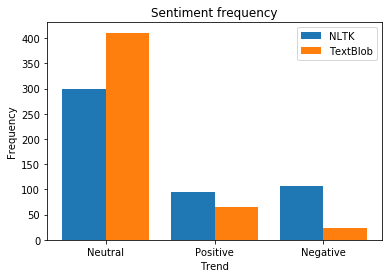

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Neutral','Positive','Negative']
Y = [NEU_1,POS_1,NEG_1]
Z = [NEU_2,POS_2,NEG_2]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'NLTK')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'TextBlob')
  
plt.xticks(X_axis, X)
plt.xlabel("Trend")
plt.ylabel("Frequency")
plt.title("Sentiment frequency")
plt.legend()
plt.show()

### Discussion

NLTK method classified about 40% words in the headlines are neutral while TextBlob classified about 60% words are neutral, which indicates there are not sufficient information to predict the sentiment of this news solely based the news headline. One reason probably is that the emotional tendency of 10-20 words cannot be easily detected. Also, news headline is mostly without bias and personal opinion. In addition, Textblob is more conserved than NLTK in analyzing the sentiment of words because it classified more words as neutral than NLTK method.

## Part III: Classification Models for Prediction

In previous section, the sentiment scores (compounds) for the news headlines obtained from sentiment analysis were combined into the stock price data for model fitting in this section. Since the response variable 'Trend', with 1 refering to a increase in the close price and 0 indicating a decrease in the clse price compared to previous day, is a binary value, it is reasonable to train classification models on the combined data to make predictions for the trend. The sentiment compounds obtained with NLTK methodology is set as the input variable for classification, since the scores generated using TextBlob contains a large number of 0's, which weakend the power of sentiment in later predictions. 

### Train-Test Split

First of all, the data is randomly splited into train set (80% of the original data) and test set (20% of the original data). The model will be fitted on the train set and evaluated on the test data to obtain model accuracies. 

### Models

***Logistic Regression***

Logistic regression is a statistical model used to predict the probability of some discrete outcomes given input variables, among which the most common outcomes are binary. Logistic regression model is a powerful and commonly-used approach for classification problems. Based on these features, a logistic regression model is reasonable for making prediction. The model was built with Python's packages and fitted on the train data. After that, the fitted model was used to make predictions on the test data. 


A confusion matrix was then generated and visualized for the logistic regression model. Based on the confusion matrix, the prediction accuracy of the logit regression model turned out to be around 57.3% (Fig 4).

***SVM(Support-vector Machines)***

SVMs are one of the most robust supervised learning models which utilize algorithms to solve both classification and regression problems. The SVMs are effective in high dimensional spaces. In order to find the optimal hyperparameters (C, gamma, and kernel) for SVM, grid search was applied to tune the parameters. The resulting optimal parameters for SVM are [C = 1, kernel = 'rbf', gamma = 1]. After tuning model parameters, same procedures were performed for building, training, and making predictions out of the SVM on the stock data.

From the confusion matrix, the accuracy of the model was calculated to be near 57.3% as well (Fig 5), which is similart to that of the logit regression.

***Random Forest***

Lastly, a random forest model was used to predict the stock trends. Random forest classifier is an ensemble tree-based algorithm for solving classification or regression problems. As for classifications, random forest aggregates the votes form different decision trees and use majority vote to decide the final class for the predicted object.

However, the fitted random forest model only achieved a prediction accuracy of 45.8% (Fig 6).


***Train-Test Split Code***

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

In [2]:
#import the preprocessed data set (with stock prices, news headlines, and sentiment scores)
data = pd.read_csv('mergeddata_sentiment.csv')
data.head()

#inspect missing values
data.isnull().sum()

#drop nans
df = data.dropna()
df.isnull().sum()

Company               0
Date                  0
Time                  0
News Headline         0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Trend                 0
NLTK_Compound         0
NLTK_Sentiment        0
TextBlob_Compound     0
TextBlob_Sentiment    0
dtype: int64

In [3]:
#use the 80:20 ratio to split the data into train and test
X = df.iloc[:, 10].to_numpy().reshape(-1, 1)
y = df.iloc[:,9].to_numpy().reshape(-1, 1).astype(int).astype(str)

#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

***Logistic regression Code***

In [4]:
#build logistic regression model on the nltk sentiment compound values
#response variable: trend(1 represent the stock prices increase from previous day, otherwise 0)
#input variable: sentiment scores from nltk and textblob accordingly

#build logistic regression model
logreg = LogisticRegression()

#fit logistic regression model on train data
logreg.fit(X_train, y_train.ravel())

#make predicitons using test data
y_pred_lr=logreg.predict(X_test)

0.5729166666666666

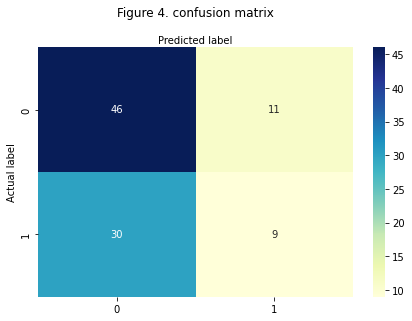

In [5]:
#get confusion matrix and accuracy score for using nltk sentiment score
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_lr)
cnf_matrix

#plot the heat map of confusion matrix
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Figure 4. confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#obtain the prediction accuracy
accuracy_lr = metrics.accuracy_score(y_test,y_pred_lr)
accuracy_lr

***SVM (Support-vector Machine) Code***

In [6]:
#gridsearch to find optimal hyperparameters for svm model
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [10, 5, 1, 0.1],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
fitted = grid.fit(X_train,y_train.ravel())
# print(fitted.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.1, gamma=10, k

0.5729166666666666

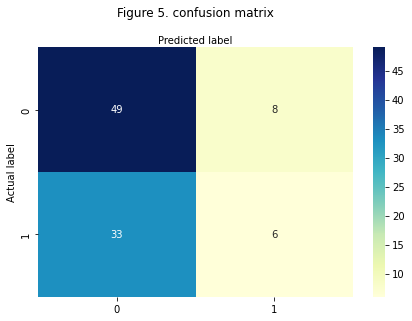

In [7]:
#use svm with tuned hyperparameter to predict the trend of stock price            
clf = svm.SVC(C=1, kernel='rbf', gamma= 1, decision_function_shape='ovr')
clf.fit(X_train, y_train.ravel())
y_pred_svm = clf.predict(X_test)


#obtain the confusion matrix and heatmap
cnf_matrix_svm = metrics.confusion_matrix(y_test,y_pred_svm)
cnf_matrix_svm

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_svm),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Figure 5. confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#obtain the accuracy score
accuracy_svm = metrics.accuracy_score(y_test,y_pred_svm)
accuracy_svm

***Random Forest Code***

0.4583333333333333

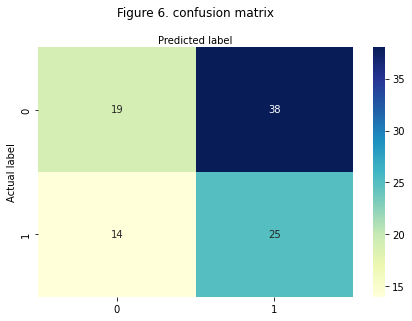

In [8]:
#build a random forrest model to predict the trend
rf=RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train.ravel())
y_pred_rf = rf.predict(X_test)

#obtain the confusion matrix
cnf_matrix_rf = metrics.confusion_matrix(y_test,y_pred_rf)
cnf_matrix_rf

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_rf),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Figure 6. confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#get the accuracy
accuracy_rf = rf.score(X_test, y_test)
accuracy_rf

## Conclusion & Limitations

Based on our model, we found that the prediction for the stock price trend using the sentiment index of daily news headline is not accurate. According to the prediction accuracy from the models we constructed, three models (Logistic Regression, Random Forest Classifier, or Support Vector Machine) could only reach the accuracy level around 57%. Even if we extended dataset from retrieving news headlines from 5 companies to 50 companies, the accuracy couldn’t get a significant improvement, nevertheless it decreased to 52% for all three models. 

Although more than 50% prediction accuracy doesn’t seem like ‘having nothing’, as we think about our question of interest, we are trying to predict 0/1 problem: to predict increasing or decreasing. In other words, for a prediction of a decrease/increase status of a single stock on a single day, it would be considered as a Bernoulli question, which means that if we randomly pick +/- as our prediction, we will have a 50% prediction accuracy. Therefore, a prediction accuracy around 55% is just ‘a little bit better than a guessing’. 

In addition, as we increase the dataset to 10 times more than the first dataset, the accuracy kept decrease from 57% to 52%, which means when the sample size increase, the accuracy got decreased, and has a trend to become closer and closer to 50%. Based on the Law of Large Numbers, the average of the results obtained from a large number of trials should be close to the expected value and tends to become closer to the expected value as more trials are performed. Therefore, we could have a guess that the prediction accuracy will be eventually approaching to 50% as we keep increase the dataset. 

However, after we searched multiple research papers online about the stock price prediction based on the sentiment analysis, we do believe the sentiment should have an influence on the stock price. Our result could only show that there’s no significant influence on the stock price movement based on the news headlines. It doesn’t mean news article will also have no significant influence on the stock price. 

As we could see from our sentiment analysis result, for the NLTK result, there are around 40% headlines having sentiment index = 0, which means 40% headline don’t have any positive or negative emotional tendencies; and for the TextBlob result, more than 60% results are having sentiment = ‘neutral’. Therefore, we could infer that the headline doesn’t provide enough information for us to predict the sentiment of this news’ article, and most of the news only have 10-20 words in their title, the emotional tendency could not easily be detected through this less information capacity.  

In addition, according to our word clouds in part I, because of the russia and ukraine conflict recently happened, both ‘increasing’ and ‘decreasing’ figures have these two words as high frequency words. We found there has a clear increase for Energy and military stocks. For example, the stock price for Lockheed Martin (LMT) has increased for 20% since Feb. 21, 2021. There also has a clear decrease for war related industry, eg. There is a 70% decrease for VanEck Russia ETF since the war starts (markets in that country were closed Right now). Therefore, even if the headline includes ‘Russia’ or ‘Ukraine’, it’s still hard to decide the stock trend, we need more information in the context of the news to decide if this leads to a positive trend or a negative trend.

## References

https://www.cnbc.com/2022/02/28/stock-market-futures-open-to-close-news.html

https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

https://finance.yahoo.com/quote/LMT/

https://www.tandfonline.com/doi/full/10.1080/24751839.2021.1874252